## SRJ - Going to study QML - Polynomial regression

In [ ]:
Key points

1. Relationship between independent and dependent variable - modelled as n-th degree polynomial function

2. Equation : y = w0 + w1x + w2x^2 + w3x^3...

3. Input feature = transformed into polynomial features of higher degrees (x^2, x**3 ... x**n)

4. Read more about .fit() and .predict() command

# Data preparation

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import os
print(os.getcwd())
#I had put the file there. 


/Users/s.poyyapakkam/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/code/Github files/QC-chemistry


In [ ]:
data = pd.read_csv('ice.csv')  #Reading the data - Temp (Independent ) vs Icecream sales (Dependent parameter)
data.head()  # prints only few lines of the file. 

,Temperature (C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


## Converting the data into X and y

In [17]:
X = data.iloc[:, 0].values.reshape(-1,1)   #iloc : integer location;  [:, 0] selects all rows and 0 means first column. 
                                            # . values - converts them to numpy array; reshape(-1,1) : Changes from (100,) to (100,1) 

y = data.iloc[:, 1].values


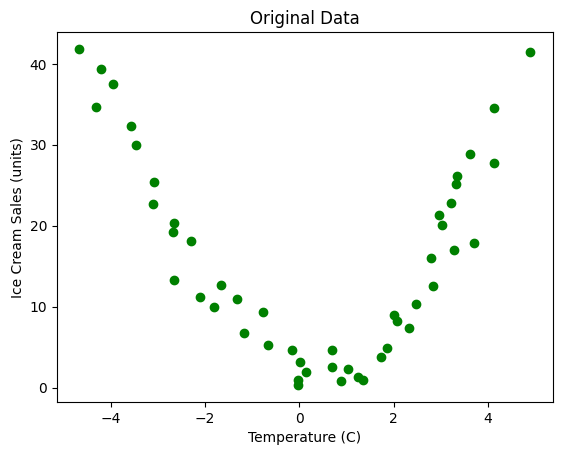

In [18]:
# Visualize the original data points
plt.scatter(X, y, color="green")
plt.title("Original Data")
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

## Transforming X values to feature X matrix - [1,x, x**2]

In [32]:
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)   #Features - X axis - Independent variables. - converts them into [1, X, X**2]

X_poly = poly_features.fit_transform(X)   #Transforms original x values to feature X matrix. 
print(X_poly)

[[ 1.00000000e+00 -4.66226268e+00  2.17366933e+01]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01]
 [ 1.00000000e+00 -4.21398477e+00  1.77576676e+01]
 [ 1.00000000e+00 -3.94966109e+00  1.55998227e+01]
 [ 1.00000000e+00 -3.57855372e+00  1.28060467e+01]
 [ 1.00000000e+00 -3.45571170e+00  1.19419433e+01]
 [ 1.00000000e+00 -3.10844012e+00  9.66239999e+00]
 [ 1.00000000e+00 -3.08130332e+00  9.49443017e+00]
 [ 1.00000000e+00 -2.67246083e+00  7.14204687e+00]
 [ 1.00000000e+00 -2.65228679e+00  7.03462523e+00]
 [ 1.00000000e+00 -2.65149803e+00  7.03044182e+00]
 [ 1.00000000e+00 -2.28826400e+00  5.23615212e+00]
 [ 1.00000000e+00 -2.11186969e+00  4.45999359e+00]
 [ 1.00000000e+00 -1.81893761e+00  3.30853403e+00]
 [ 1.00000000e+00 -1.66034773e+00  2.75675458e+00]
 [ 1.00000000e+00 -1.32637898e+00  1.75928121e+00]
 [ 1.00000000e+00 -1.17312327e+00  1.37621820e+00]
 [ 1.00000000e+00 -7.73330043e-01  5.98039355e-01]
 [ 1.00000000e+00 -6.73752802e-01  4.53942838e-01]
 [ 1.00000000e+00 -1.49634867e-

## S2 : Model training

In [33]:
from sklearn.linear_model import LinearRegression   #Fit a linear relationship between input features and target variable. 


lr_model = LinearRegression()
#Now, fit the model (linear regression object) on the data
lr_model.fit(X_poly, y)  #Fit: best fitting coeffs. to minimize the error between predicted and actual target values. 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Read more about .fit () command

## S3 : Model prediction and testing

In [34]:
y_pred = lr_model.predict(X_poly)

df = pd.DataFrame({'Actual Values':y, 'Predicted Values':y_pred})
print(df)

    Actual Values  Predicted Values
0       41.842986         46.564507
1       34.661120         40.600548
2       39.383001         38.915089
3       37.539845         34.749272
4       32.284531         29.331940
5       30.001138         27.649735
6       22.635401         23.192862
7       25.365022         22.863178
8       19.226970         18.222266
9       20.279679         18.009098
10      13.275828         18.000794
11      18.123991         14.418541
12      11.218294         12.853070
13      10.012868         10.504868
14      12.615181          9.364587
15      10.957731          7.264266
16       6.689123          6.437055
17       9.392969          4.683654
18       5.210163          4.337906
19       4.673643          3.116139
20       0.328626          2.983983
21       0.897603          2.981829
22       3.165600          2.944811
23       1.931416          2.869446
24       2.576782          3.251711
25       4.625689          3.259923
26       0.789974          3

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(r2)

0.9321137090299405


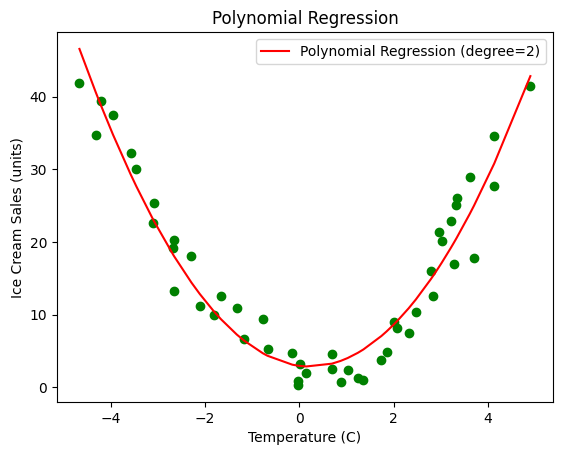

In [37]:
import matplotlib.pyplot as plt

# Visualize the polynomial regression results
plt.scatter(X, y, color="green")
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.title('Polynomial Regression')
plt.show()

In [38]:
X_new = np.array([[1.9929]])  # Example value to predict
X_new_poly = poly_features.transform(X_new)
y_new_pred = lr_model.predict(X_new_poly)
print(y_new_pred)

[8.57450466]
